<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


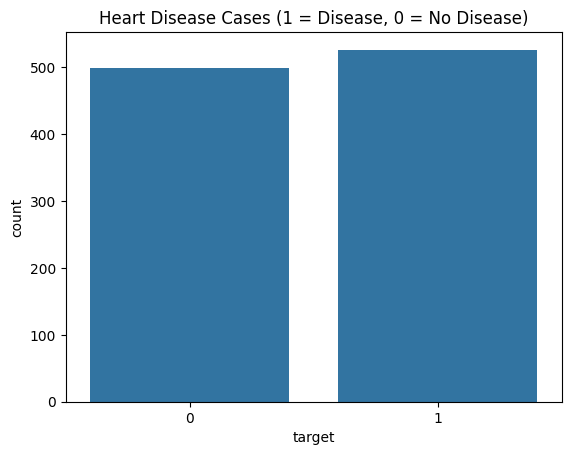

🎯 Logistic Regression
Accuracy: 0.7951219512195122
[[73 29]
 [13 90]]


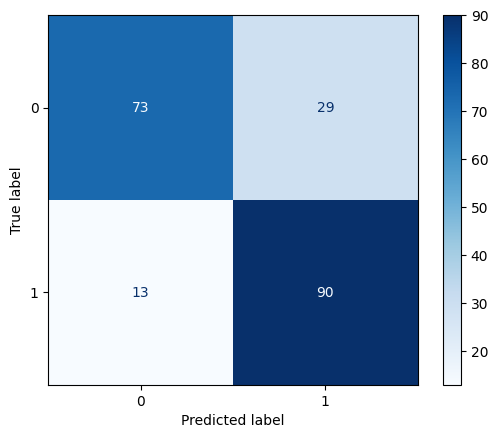

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

🎯 Random Forest
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



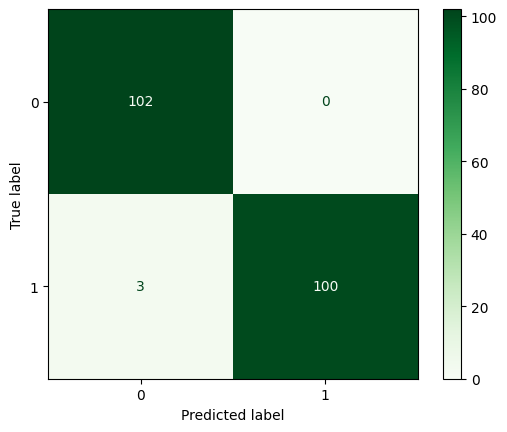

📍 K-Nearest Neighbors
Accuracy: 0.8341463414634146
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



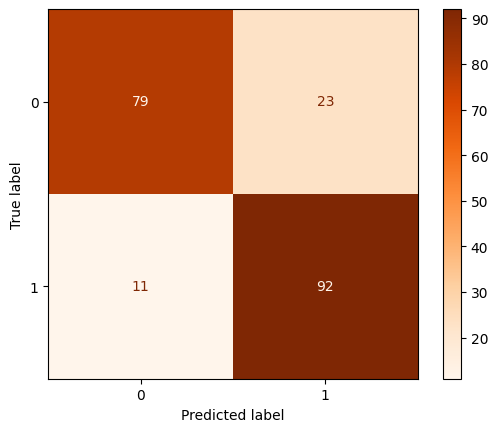

,Model,Accuracy,F1 Score
1,Random Forest,0.985366,0.985222
2,KNN,0.834146,0.844037
0,Logistic Regression,0.795122,0.810811


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('/content/heart.csv')
df.head()

# Data structure
df.info()

# Summary statistics
df.describe()

# Check if any null values
df.isnull().sum()

# Check target balance
df['target'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Heart Disease Cases (1 = Disease, 0 = No Disease)")
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate input (X) and output (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Accuracy
print("🎯 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("🎯 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.show()

# Initialize and train KNN (k=5 is default)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict
knn_pred = knn_model.predict(X_test)

# Evaluate
print("📍 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, cmap='Oranges')
plt.show()

from sklearn.metrics import f1_score

# Calculate F1 scores
log_f1 = f1_score(y_test, y_pred)
rf_f1 = f1_score(y_test, rf_pred)
knn_f1 = f1_score(y_test, knn_pred)

# Summary table
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Accuracy': [log_acc, rf_acc, knn_acc],
    'F1 Score': [log_f1, rf_f1, knn_f1]
})

summary_df.sort_values(by='Accuracy', ascending=False)











